<a href="https://colab.research.google.com/github/mrrana51940/ML-projects/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

price_data=pd.read_csv('/content/HousingData.csv')
price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
price_data.shape

(506, 14)

In [13]:
price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#check null values
price_data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [10]:
price_data['CRIM']=price_data['CRIM'].fillna(price_data['CRIM'].mean())
price_data['ZN']=price_data['ZN'].fillna(price_data['ZN'].mean())
price_data['INDUS']=price_data['INDUS'].fillna(price_data['INDUS'].mean())
price_data['CHAS']=price_data['CHAS'].fillna(price_data['CHAS'].mean())
price_data['AGE']=price_data['AGE'].fillna(price_data['AGE'].mean())
price_data['LSTAT']=price_data['LSTAT'].fillna(price_data['LSTAT'].mean())

In [12]:
price_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [14]:
price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

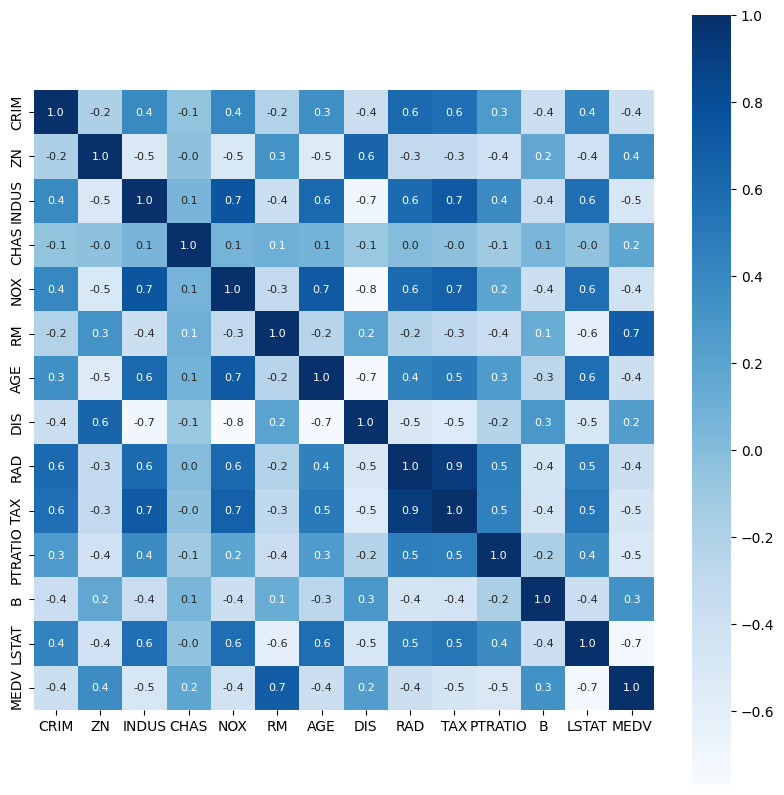

In [18]:
'''
understanding the correlation between various features in  the dataset:
1. Positive Correlation
2. Negative Correlation
'''
correlation=price_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [19]:
#separating the data and labels
x=price_data.drop(columns='MEDV',axis=1)
y=price_data['MEDV']
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [21]:
#Training the model
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
#for training data
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[23.111933  21.002054  20.098005  34.6785    13.903282  13.50405
 21.99768   15.185856  10.898882  22.693007  13.793858   5.588061
 29.800228  50.001865  34.895287  20.598177  23.39295   19.206455
 32.701313  19.612007  26.988474   8.401995  45.99861   21.709255
 27.087645  19.361818  19.29078   24.79976   22.606655  31.695913
 18.544813   8.69803   17.412104  23.69795   13.300306  10.503882
 12.704823  24.999336  19.694311  14.86768   24.191     25.001179
 14.9010935 16.999802  15.599213  12.70874   24.514244  15.015075
 50.000168  17.517124  21.198206  32.001003  15.598514  22.89534
 19.298925  18.713509  23.297705  37.200474  30.097256  33.096275
 20.99633   49.994064  13.402074   5.011779  16.499424   8.394517
 28.678583  19.511633  20.586819  45.41904   39.800873  33.396564
 19.80326   33.40312   25.283972  50.00732   12.525352  17.445702
 18.598032  22.603727  50.01068   23.792957  23.312153  23.079176
 41.696415  16.109999  31.621521  36.09384    7.00184   20.38224
 19.994478  1

In [32]:
#for Training data
#check R squared error
error1=metrics.r2_score(y_train,x_train_prediction)
print('R squred error for training data = ',error1)

#check mean absolute error
error2=metrics.mean_absolute_error(y_train,x_train_prediction)
print('Mean absolute error for training data = ',error2)

R squred error for training data =  0.9999978610042701
Mean absolute error for training data =  0.00928458813393476


In [26]:
#for test data
x_test_prediction=model.predict(x_test)
print(x_test_prediction)


[20.405924  20.477468  29.724236  28.910017  11.108806  13.545434
 29.054266  29.477379  16.373798  20.419409  25.627071  24.823458
 19.77504   19.990616  22.01412   21.315174  18.367859   9.240526
  9.224724  14.953377  22.357378  20.494747  33.839092  18.544884
 11.970066  18.83994   46.460068  30.968653  32.47852   19.971586
 14.696011  19.699318  29.217834  23.388533   8.546262  18.017292
  7.5079556 21.581896  21.575703  21.34949   26.874626  12.499342
 27.755104   8.013492  20.71989   14.678454  36.5428    14.7590275
 30.610044  15.637317  31.20324   29.84458    6.1892004 32.533028
 23.885601  20.602999  18.856968  20.435276  16.104778  22.2516
 19.888462  22.588682  18.179302  27.45305   32.7948    25.24269
 49.908264  30.13958    9.802634  23.418715  14.524903   8.009073
 15.433082  17.845602  26.312075  23.471096  21.937634  21.015541
 19.551497  24.250965  33.97703   18.098131  21.151657  30.950857
 32.41433   30.393885  16.77537   24.734386  28.854979  19.283083
 21.051466  

In [33]:
#for test data
#R squred error
error3=metrics.r2_score(y_test,x_test_prediction)
print('R squred error  for test data = ',error3)

#mean absolute error
error4=metrics.mean_absolute_error(y_test,x_test_prediction)
print('Mean absolute error  for test data = ',error4)

R squred error  for test data =  0.8960185116688638
Mean absolute error  for test data =  2.2241158204920146


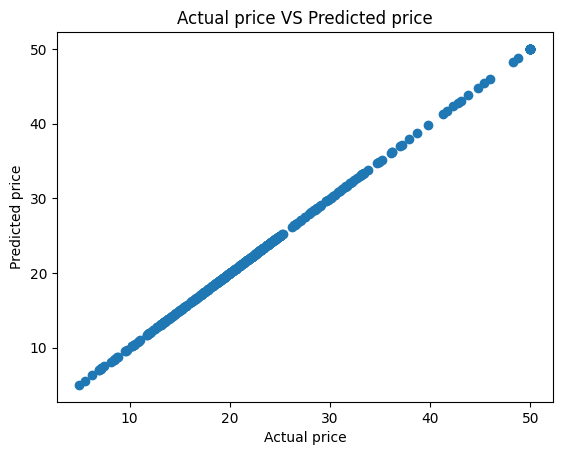

In [30]:
#lets try to visualize the actual price and predicted price for train data
plt.scatter(y_train,x_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show()

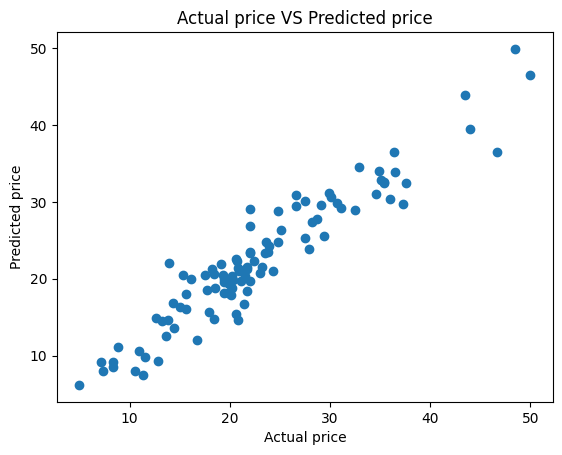

In [31]:
#lets try to visualize the actual price and predicted price for test data
plt.scatter(y_test,x_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show()

In [36]:
input_data=[0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15]
cng_data=np.array(input_data)
cng_data=cng_data.reshape(1,-1)
prediction=model.predict(cng_data)
print(prediction)

[27.087645]
